In [39]:
import os
import pandas as pd
import matplotlib.pylab as plt
% matplotlib inline
import numpy as np

In [40]:
l=[]
for fn in os.listdir("."):
    if ".csv" in fn:
        l.append(pd.read_csv(fn,index_col="DATE & TIME"))
df = pd.concat(l)

In [41]:
# clean 
df.columns = ["f"]

In [42]:
events = df[df["f"] < 49.85]
events.index =pd.to_datetime(events.index)
events = events.sort_index(axis="index")

In [43]:
t=events.reset_index().values
current_time, freq = t[0]
out = [[current_time,freq]]
for line in t[1:]:
    time = line[0]
    freq = line[1]
    if (time - current_time).seconds > 5*60:
        current_time = time
        out.append([time,freq])

(array([ 17.,   8.,   6.,   3.,   3.,   0.,   3.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.05000000e+02,   1.50281500e+05,   3.00258000e+05,
          4.50234500e+05,   6.00211000e+05,   7.50187500e+05,
          9.00164000e+05,   1.05014050e+06,   1.20011700e+06,
          1.35009350e+06,   1.50007000e+06,   1.65004650e+06,
          1.80002300e+06,   1.94999950e+06,   2.09997600e+06,
          2.24995250e+06,   2.39992900e+06,   2.54990550e+06,
          2.69988200e+06,   2.84985850e+06,   2.99983500e+06]),
 <a list of 20 Patch objects>)

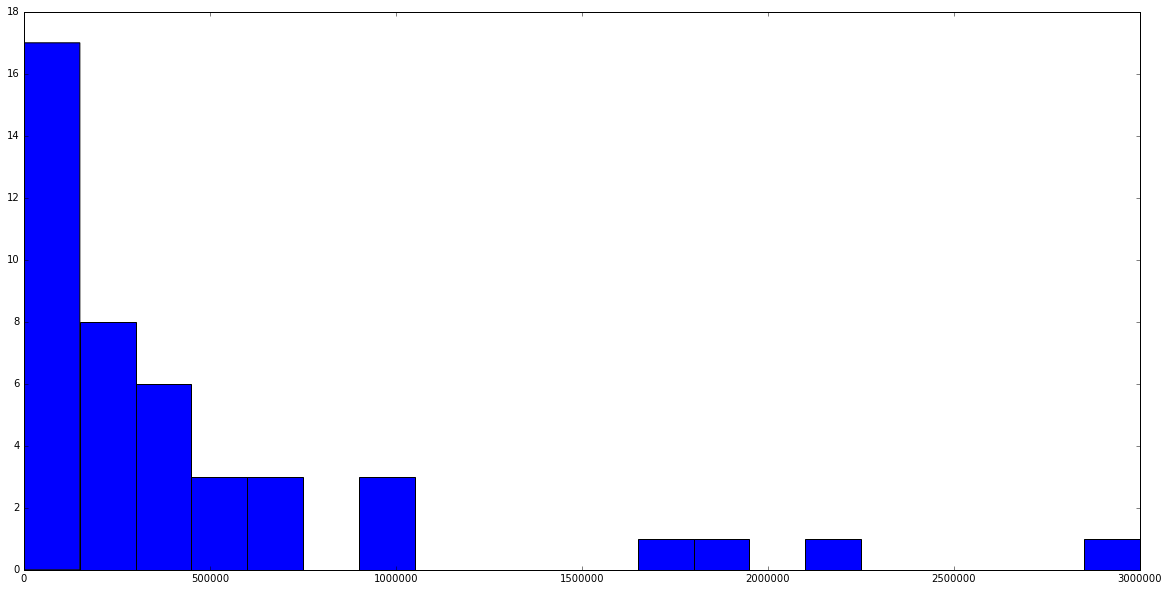

In [45]:
mout = np.array(out)
times = mout.T[0]
deltas = []
for i in range(1,len(times[1:])):
    deltas.append((times[i] - times[i-1]).total_seconds())
plt.figure(figsize=(20,10))
plt.hist(deltas,bins=20)